<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Illustration-of-the-system" data-toc-modified-id="Illustration-of-the-system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Illustration of the system</a></span></li></ul></div>

# Description

Notebook to illustrate how population models work

# Load

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, interact_manual

from statsmodels.tsa.stattools import acf

from scipy.signal import find_peaks

In [3]:
from RBmodel.analysis import get_cycle_stats, get_phase_durations

from RBmodel import cell_models

from RBmodel import load_utils, plot_utils, analysis

In [4]:
import itertools

# Illustration of the system

In [13]:
params = cell_models.DEFAULT_PARAMS.copy()

In [85]:
params['transition'] = "RBc"

params['k_trans'] = .1
params['delta'] = 0.8
params['epsilon'] = .1
params['transition_th'] = 1

In [86]:
params['alpha'] = 2

In [87]:
params

{'alpha': 2,
 'beta0': 0.09,
 'delta': 0.8,
 'gamma': 0.03,
 'epsilon': 0.1,
 'eta': 1.0,
 'dt': 0.1,
 'duration_SG2': 12,
 'transition_th': 1,
 'k_trans': 0.1,
 'division': 'timer',
 'transition': 'RBc',
 'max_cycles': 100000.0}

In [88]:
N_cells=1 # number of cells in the population

T_burn = 1000
T = int(1e6) # number of timesteps

pop = cell_models.population(N_cells, params=params)
pop.burn_in(T_burn)
pop.grow(T)
results = pop.gather_results()

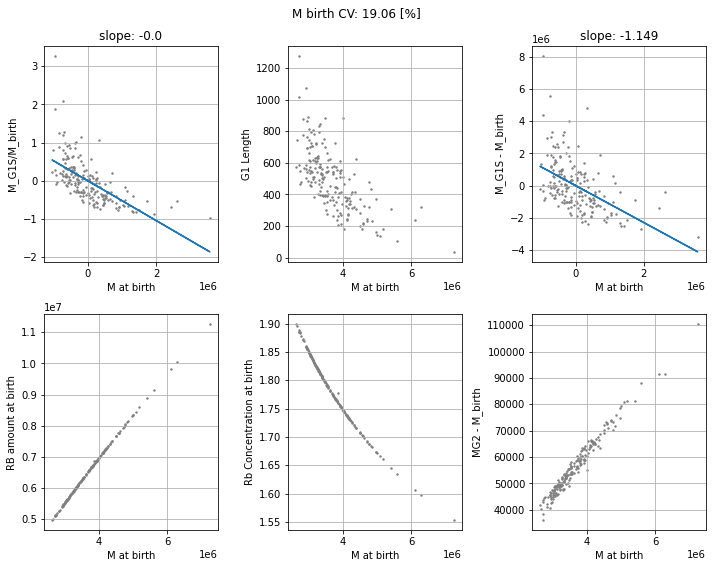

In [90]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
for cell in pop.cells:
    plot_utils.plot_size_control(cell=cell, ax=ax)
# fig.tight_layout()

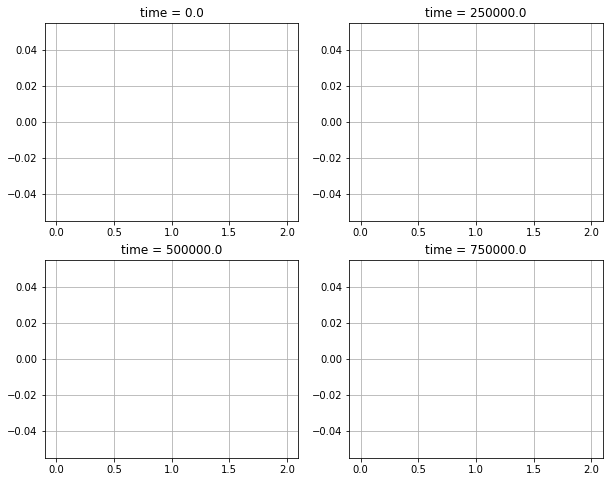

In [11]:
_, ax = plt.subplots(2, 2, figsize=(10, 8))

for (i,j) in itertools.product(range(2), repeat=2):
    idx = T / 4 * j + i * T/2
    
    ax[i,j].hist(results["M"].loc[idx], bins=np.linspace(0, 2, 20));
    ax[i,j].grid()
    ax[i,j].set_title(f"time = {idx}")

In [12]:
flat_M = results["M"].values.flatten().round(decimals=2)

flat_ph = results["phase"].values.flatten()

vals_M = np.sort(np.unique(flat_M))
rat_g1g2 = []
for m in vals_M: 
    idx = np.where(flat_M==m)[0]
    phases = flat_ph[idx]
    G1_G2 = np.sum(phases=='G1')/len(phases)
    rat_g1g2.append(G1_G2)

In [ ]:
plt.plot(vals_M, 1-np.array(rat_g1g2))
plt.xlabel("M")
plt.ylabel("Proportion of cells in G2")
plt.grid()